# Group Number : 20
Members: 



In [1]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


<img src="https://github.com/netariel/Olympic-Games-Data/raw/main/wordcloud%20(1).jpg" width="600" height="400">






In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [3]:
url = 'https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/dataset_olympics.csv'
first_olymp_df= pd.read_csv(url)
first_olymp_df.shape

(70000, 15)

Our data consists of 15 columns and 70,000 rows

In [4]:
additional_data_df = pd.read_csv('https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/noc_region.csv')
change_olp_df = pd.merge(first_olymp_df, additional_data_df[['noc_region','reg']], left_on='NOC', right_on='noc_region', how='left')
change_olp_df.shape

(70000, 17)

In [5]:
olympic_df = change_olp_df.drop(columns=['noc_region'])
olympic_df.shape

(70000, 16)

In [6]:
olympic_df

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2012 Summer  2012  Summer     London   
2             Denmark  DEN  1920 Summer  1920  Summer  Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
4         Netherlands  NED  1988 Winter  1988  Winter    Calgary   
...               ...  ...          ...   ...     ...        ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer   Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer     Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter     Nagano   

                 Sport                             Event Medal             reg  
0           Basketball       Basketball Men's Basketball   NaN           China  
1                 Judo      Judo Men's Extra-Lightweight   NaN           China  
2             Football           Football Men's Football   NaN         Denmark  
3           Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold         Denmark  
4        Speed Skating  Speed Skating Women's 500 metres   NaN     Netherlands  
...                ...                               ...   ...             ...  
69995    Alpine Skiing  Alpine Skiing Men's Giant Slalom   NaN              UK  
69996    Alpine Skiing        Alpine Skiing Men's Slalom   NaN              UK  
69997        Athletics     Athletics Men's 10,000 metres   NaN       Australia  
69998        Athletics      Athletics Men's 5,000 metres   NaN       Australia  
69999  Nordic Combined        Nordic Combined Men's Team   NaN  Czech Republic  

[70000 rows x 16 columns]

In [7]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
reg        object
dtype: object

בשביל לדעת איך לעבוד עם הנתונים רצינו לדעת את סוג האובייקט בכל עמודה

In [8]:
num_of_team = len(olympic_df['Team'].unique())
num_of_NOC = len(olympic_df['NOC'].unique())
print(f"num of Team:{num_of_team}\nnum of NOC:{num_of_NOC}")

num of Team:827
num of NOC:226


ראינו שיש אי התאמה בין מספר המדינות לבין מספר סמלי המדינה.
בדקנו את שמות המדינות וראינו שיש מדינות שקרויות פעמים עם שינוי בתו, אך מדובר על אותה מדינה ולכן החלטנו שבמידה ונרצה להתייחס לנתון המדינה/קבוצה נשתמש בעמודת הסמל

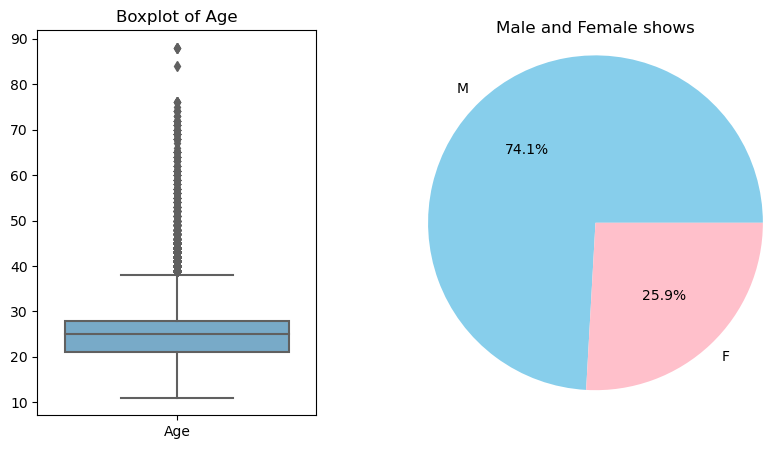

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data=olympic_df[['Age']], ax=ax[0],palette='Blues')
ax[0].set_title('Boxplot of Age')
sns.set_palette("pastel")
sex_counts = olympic_df['Sex'].value_counts()
ax[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], radius=1.5)
ax[1].set_title('Male and Female shows', y=1.15)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
age_m_df = olympic_df[olympic_df['Sex'] == 'M']
# age_m_df =age_m_df.groupby('Age')[['Medal']].count() 
# age_m_df= age_m_df.reset_index()
age_m_df
# age_m_df = age_m_df.replace(0,True)
# plt.figure(figsize=(4,3))  # גודל התרשים
# sns.histplot(x='Medal', data=age_m_df, hue='Medal')

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
10         6                 Per Knut Aaland   M  31.0   188.0    75.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season         City  \
0               China  CHN  1992 Summer  1992  Summer    Barcelona   
1               China  CHN  2012 Summer  2012  Summer       London   
2             Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
10      United States  USA  1992 Winter  1992  Winter  Albertville   
...               ...  ...          ...   ...     ...          ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter    Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter    Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer     Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer       Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter       Nagano   

                      Sport                                     Event Medal  \
0                Basketball               Basketball Men's Basketball   NaN   
1                      Judo              Judo Men's Extra-Lightweight   NaN   
2                  Football                   Football Men's Football   NaN   
3                Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold   
10     Cross Country Skiing  Cross Country Skiing Men's 10 kilometres   NaN   
...                     ...                                       ...   ...   
69995         Alpine Skiing          Alpine Skiing Men's Giant Slalom   NaN   
69996         Alpine Skiing                Alpine Skiing Men's Slalom   NaN   
69997             Athletics             Athletics Men's 10,000 metres   NaN   
69998             Athletics              Athletics Men's 5,000 metres   NaN   
69999       Nordic Combined                Nordic Combined Men's Team   NaN   

                  reg  
0               China  
1               China  
2             Denmark  
3             Denmark  
10                USA  
...               ...  
69995              UK  
69996              UK  
69997       Australia  
69998       Australia  
69999  Czech Republic  

[51877 rows x 16 columns]

רצינו לראות את ההתפלגות הגילאים והמינים של השחקנים שהשתתפו באולימפיאדה

In [11]:
summer_olympics_df = olympic_df[olympic_df['Season'] == 'Summer']
winter_olympics_df = olympic_df[olympic_df['Season'] == 'Winter']

In [12]:
summer_top_med_df = summer_olympics_df.groupby('NOC')[['Medal']].count() 
summer_top_med_df= summer_top_med_df.reset_index()
summer_top_med_df = summer_top_med_df.nlargest(10, 'Medal')
winter_top_med_df = winter_olympics_df.groupby('NOC')[['Medal']].count() 
winter_top_med_df= winter_top_med_df.reset_index()
winter_top_med_df = winter_top_med_df.nlargest(10, 'Medal')

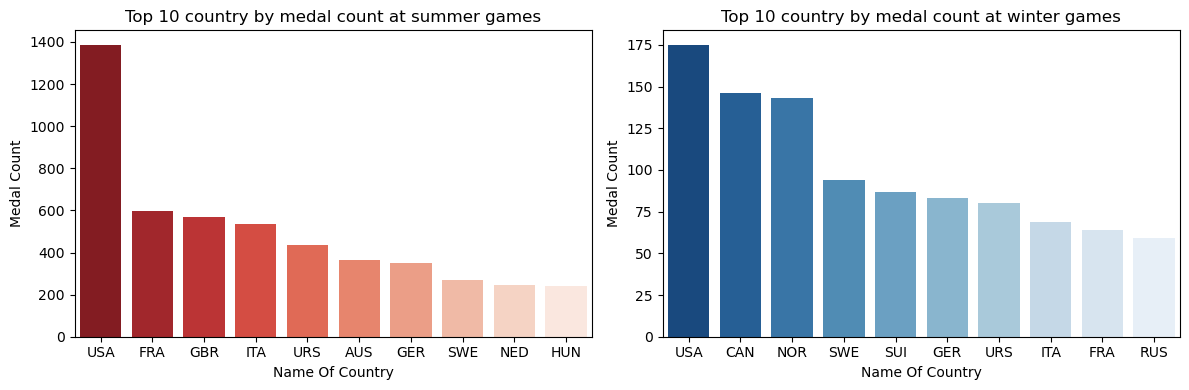

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=summer_top_med_df, x='NOC', y='Medal', ax=ax[0], palette='Reds_r')
ax[0].set_title('Top 10 country by medal count at summer games')
ax[0].set_xlabel('Name Of Country')
ax[0].set_ylabel('Medal Count')
sns.barplot(data=winter_top_med_df, x='NOC', y='Medal', ax=ax[1], palette='Blues_r')
ax[1].set_title('Top 10 country by medal count at winter games')
ax[1].set_xlabel('Name Of Country')
ax[1].set_ylabel('Medal Count')

plt.tight_layout()
plt.show()

In [14]:
med_df = olympic_df.groupby('reg')[['Medal']].count() 
med_df= med_df.reset_index()
med_df = med_df.nlargest(10, 'Medal')

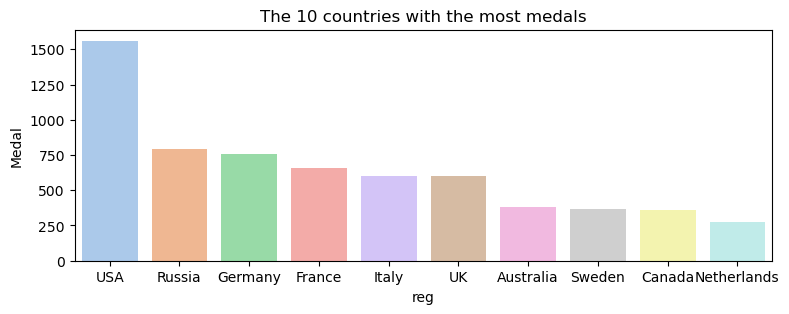

In [15]:
plt.figure(figsize=(9, 3))
sns.barplot(x='reg', y='Medal', data=med_df)
plt.title('The 10 countries with the most medals')
plt.xlabel('reg')
plt.ylabel('Medal')
plt.show()

In [16]:
events_summer_df = summer_olympics_df.groupby('Games')[['Sport']].nunique()
events_summer_df = events_summer_df.reset_index()
events_winter_df = winter_olympics_df.groupby('Games')[['Sport']].nunique()
events_winter_df = events_winter_df.reset_index()

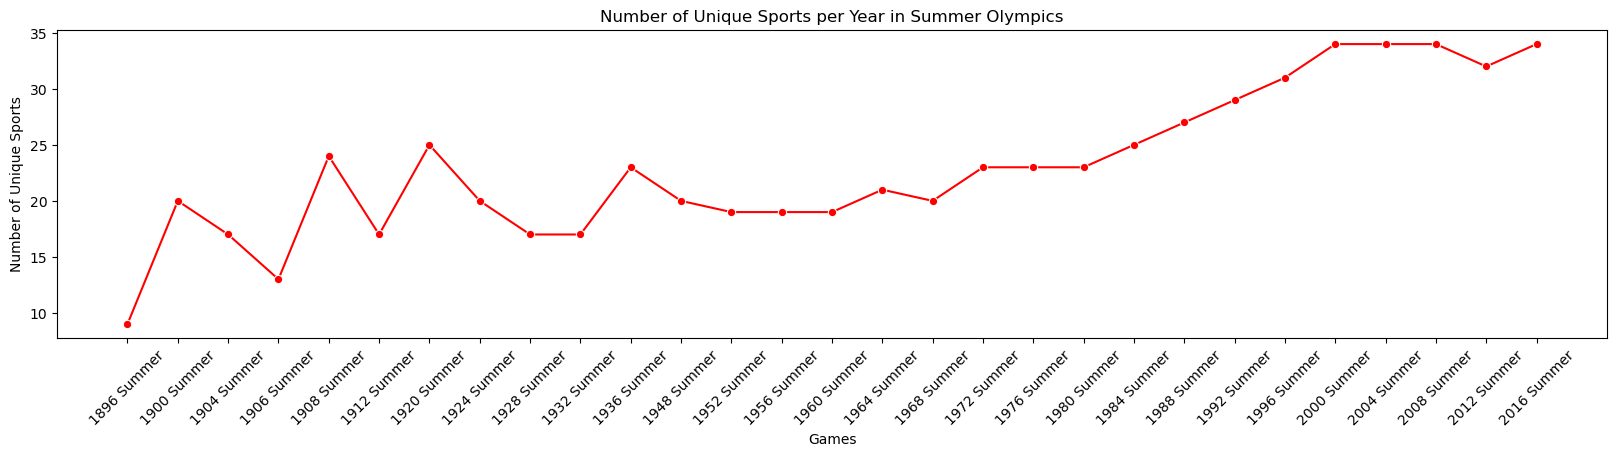

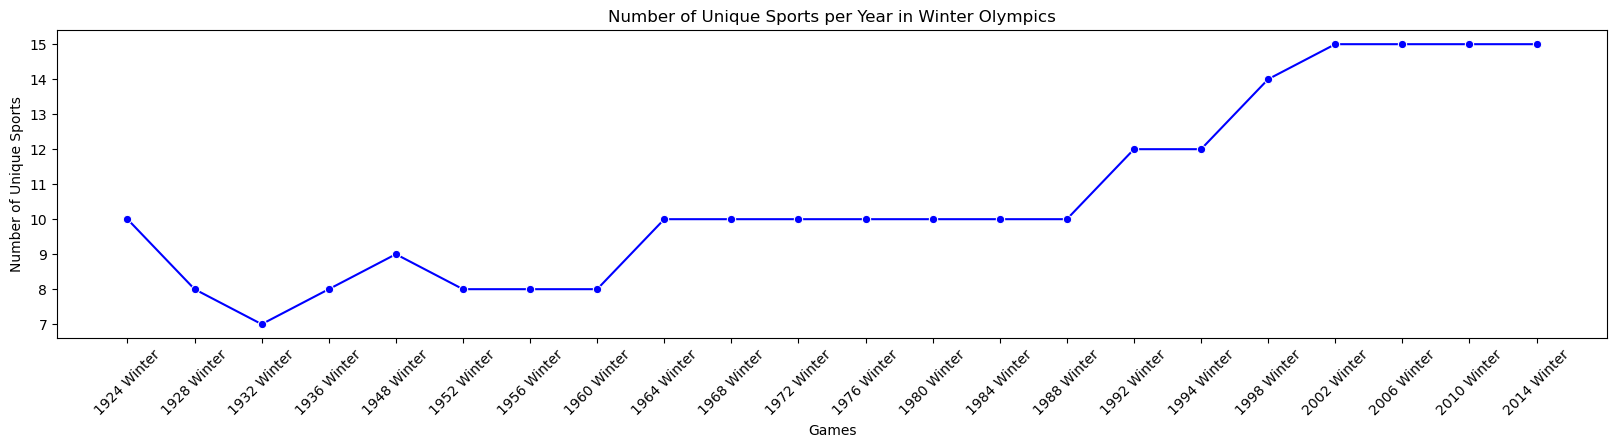

In [17]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_summer_df, x='Games', y='Sport', marker='o', color='red')
plt.title('Number of Unique Sports per Year in Summer Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_winter_df, x='Games', y='Sport', marker='o', color='blue')
plt.title('Number of Unique Sports per Year in Winter Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()

In [18]:
top_ath_df = olympic_df.groupby('Name')[['Medal']].count() 
top_ath_df= top_ath_df.reset_index()
top_ath_df = top_ath_df.nlargest(10, 'Medal')
top_ath_df = top_ath_df.merge(olympic_df[['Name','NOC']], on='Name', how='left').drop_duplicates()
top_ath_df

Name  Medal  NOC
0       Nikolay Yefimovich Andrianov     15  URS
24               Ole Einar Bjrndalen     13  NOR
51            Birgit Fischer-Schmidt     12  GDR
55            Birgit Fischer-Schmidt     12  GER
64     Natalie Anne Coughlin (-Hall)     12  USA
76    Matthew Nicholas "Matt" Biondi     11  USA
88         Viktor Ivanovych Chukarin     11  URS
104           Vra slavsk (-Odloilov)     11  TCH
122  Aleksandr Nikolayevich Dityatin     10  URS
138                     Marit Bjrgen     10  NOR
157      Polina Hryhorivna Astakhova     10  URS

In [19]:
change_ath_df = olympic_df.groupby('Name')[['NOC']].nunique() 
change_ath_df= change_ath_df.reset_index()
change_ath_df = change_ath_df.nlargest(61, 'NOC')
change_ath_df = change_ath_df.rename(columns={'NOC': 'Number of shows'})
change_ath_df = change_ath_df.merge(olympic_df[['Name','reg','Year','Season','Sport']], on='Name', how='left').drop_duplicates()
change_ath_df

Name  Number of shows         reg  Year  \
0                        Mamadou Diallo                4  Mauritania  1984   
1                        Mamadou Diallo                4      Guinea  1980   
2                        Mamadou Diallo                4        Mali  2004   
3                        Mamadou Diallo                4     Senegal  1984   
4            Andrey Pavlovich Bakhvalov                3      Russia  1988   
..                                  ...              ...         ...   ...   
285  Annemarie Josefina "Anna" Cox-Wood                2   Australia  1992   
287  Annemarie Josefina "Anna" Cox-Wood                2   Australia  1996   
288  Annemarie Josefina "Anna" Cox-Wood                2   Australia  2000   
289     Apolinario "Polin" Belisle Gmez                2      Belize  1988   
290     Apolinario "Polin" Belisle Gmez                2    Honduras  1992   

     Season          Sport  
0    Summer      Wrestling  
1    Summer           Judo  
2    Summer       Football  
3    Summer      Athletics  
4    Winter  Speed Skating  
..      ...            ...  
285  Summer       Canoeing  
287  Summer       Canoeing  
288  Summer       Canoeing  
289  Summer      Athletics  
290  Summer      Athletics  

[181 rows x 6 columns]

In [20]:
all_countries = change_ath_df['reg'].value_counts()
print(all_countries)

reg
Russia                         68
Egypt                          13
Syria                           9
Germany                         9
Austria                         7
Uzbekistan                      6
Kuwait                          5
Belarus                         4
Czech Republic                  4
Serbia                          4
Individual Olympic Athletes     3
Kazakhstan                      3
Switzerland                     3
Sudan                           3
Australia                       3
UK                              3
Israel                          2
Ivory Coast                     2
Netherlands                     2
Romania                         2
Ukraine                         2
Zimbabwe                        2
USA                             2
France                          2
Pakistan                        1
India                           1
Latvia                          1
San Marino                      1
Hungary                         1
Belize    

In [21]:
male_df = summer_olympics_df[summer_olympics_df['Sex'] == 'M']
female_df = summer_olympics_df[summer_olympics_df['Sex'] == 'F']

We wanted to see the height distribution of the players in the various professions, whether there is an effect of the player's height on the sport in which he/she participates.

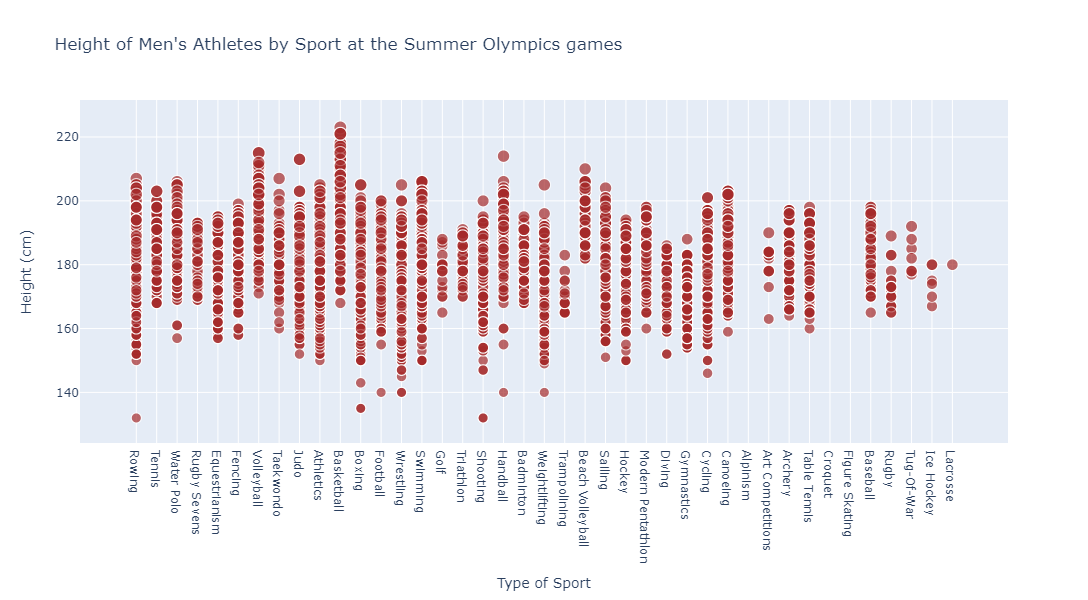

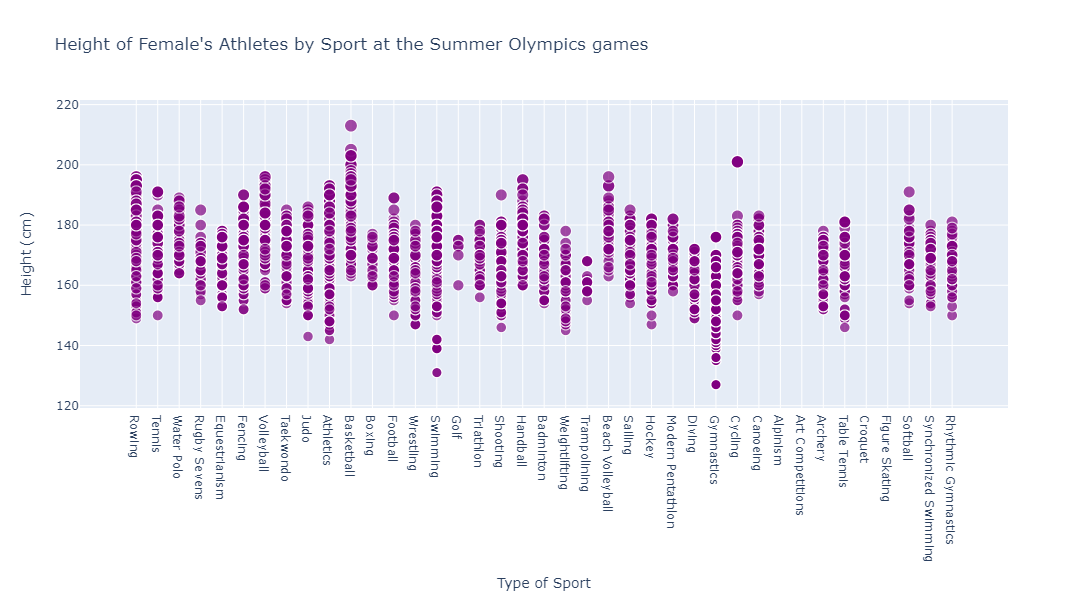

In [22]:
female_sports = female_df['Sport'].unique()
male_sports = male_df['Sport'].unique()
sport_order = list(set(female_sports) & set(male_sports))
female_df_cleaned = female_df.dropna(subset=['Height'])
male_df_cleaned = male_df.dropna(subset=['Height'])

fig1 = px.scatter(male_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['brown'],  
                  size='Height',
                  size_max=13,
                  hover_name='Sport',
                  title="Height of Men's Athletes by Sport at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)'},
                  height=600)

fig2 = px.scatter(female_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['purple'],  
                  size='Height',
                  size_max=13,
                  hover_name='Sport',
                  title="Height of Female's Athletes by Sport at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)'},
                  height=600)

fig1.show()
fig2.show()



You can see abnormal data for both men and women in the distribution of heights in diving, gymnastics, table tennis, volleyball and beach volleyball.



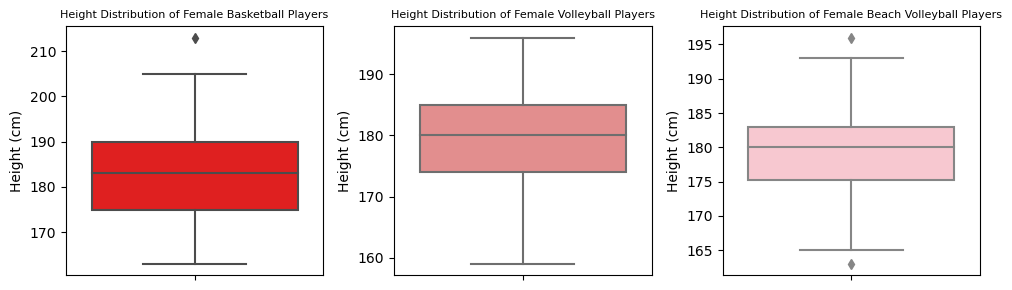

In [23]:
female_basketball_df = summer_olympics_df[(summer_olympics_df['Sex'] == 'F') & (summer_olympics_df['Sport'] == 'Basketball')]
female_volleyball_df = summer_olympics_df[(summer_olympics_df['Sex'] == 'F') & (summer_olympics_df['Sport'] == 'Volleyball')]
female_beach_volleyball_df = summer_olympics_df[(summer_olympics_df['Sex'] == 'F') & (summer_olympics_df['Sport'] == 'Beach Volleyball')]
fig = plt.figure(figsize=(10, 3))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
sns.boxplot(y='Height', data=female_basketball_df, color='red', ax=ax1)
ax1.set_title('Height Distribution of Female Basketball Players', fontsize=8)
ax1.set_ylabel('Height (cm)')
sns.boxplot(y='Height', data=female_volleyball_df, color='lightcoral', ax=ax2)
ax2.set_title('Height Distribution of Female Volleyball Players', fontsize=8)
ax2.set_ylabel('Height (cm)')
sns.boxplot(y='Height', data=female_beach_volleyball_df, color='pink', ax=ax3)
ax3.set_title('Height Distribution of Female Beach Volleyball Players', fontsize=8)
ax3.set_ylabel('Height (cm)')

plt.tight_layout()
plt.show()

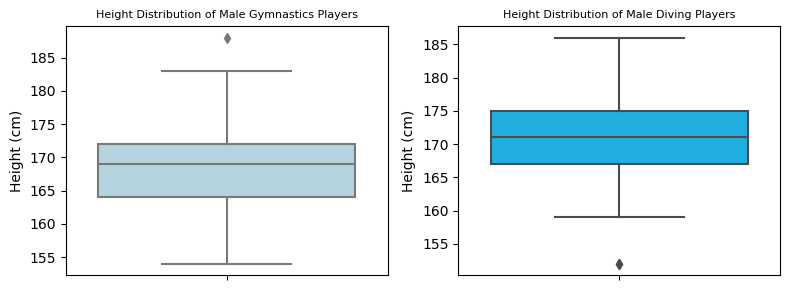

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
male_gymnastics_df = summer_olympics_df[(summer_olympics_df['Sex'] == 'M') & (summer_olympics_df['Sport'] == 'Gymnastics')]
sns.boxplot(y='Height', data=male_gymnastics_df, color='lightblue', ax=ax1)
ax1.set_title('Height Distribution of Male Gymnastics Players', fontsize=8)
ax1.set_ylabel('Height (cm)')
male_diving_df = summer_olympics_df[(summer_olympics_df['Sex'] == 'M') & (summer_olympics_df['Sport'] == 'Diving')]
sns.boxplot(y='Height', data=male_diving_df, color='deepskyblue', ax=ax2)
ax2.set_title('Height Distribution of Male Diving Players', fontsize=8)
ax2.set_ylabel('Height (cm)')
plt.tight_layout()
plt.show()

The average height of men in the world is: 1.77 and the average height of women in the world is: 1.60. According to the height data of the players participating in these sports, we see that the men participating in diving or gymnastics are shorter than average. In addition, the women who participate in basketball, volleyball and beach volleyball are much taller than the average height of women.
It can be concluded from this that in order to participate in these competitions it is recommended or one should have an abnormal height than the world average.

If you would like to know which sport is recommended for you to participate in, you must enter the following data:

In [25]:
heights = list(range(145, 211)) * 2
genders = ['M'] * 66 + ['F'] * 66

sports_men = (
    ['Gymnastics'] * 20 +
    ['Gymnastics/Diving'] * 11 +
    ['whatever your heart desires'] * 11 +
    ['Basketball/Vollyball'] * 6 +
    ['Basketball'] * 18
)

sports_women = (
    ['Gymnastics'] * 6 +
    ['Gymnastics/Diving'] * 4 +
    ['whatever your heart desires'] * 21 +
    ['Basketball/Vollyball/Beach Vollyball'] * 18 +
    ['Basketball'] * 17
)

sports = sports_men + sports_women

images = (
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/men%20gymnastic.jpg'] * 20 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/men%20diving.jpg'] * 11 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/men%20sport1.jpg'] * 11 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/men%20volleyball.jpg'] * 6 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/men%20basketball.jpg'] * 18 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/women%20gymnastic.jpg'] * 6 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/women%20diving.jpg'] * 4 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/women%20sport.jpg'] * 21 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/women%20volleyball.jpg'] * 18 +
    ['https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/women%20basketball.jpg'] * 17
)

sports_recommendation_df = pd.DataFrame({
    'Height': heights,
    'Gender': genders,
    'Sport': sports,
    'Image': images
})

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Input(id='height-input', type='number', placeholder='Enter Height'),
    dcc.Dropdown(
        id='gender-dropdown',
        options=[
            {'label': 'Male', 'value': 'M'},
            {'label': 'Female', 'value': 'F'}
        ],
        placeholder='Select Gender'
    ),
    html.Div(id='output-recommendation')
])

@app.callback(
    Output('output-recommendation', 'children'),
    [Input('height-input', 'value'), Input('gender-dropdown', 'value')]
)
def update_recommendation(height, gender):
    if height is not None and gender is not None:
        recommendation = sports_recommendation_df[
            (sports_recommendation_df['Height'] == height) & 
            (sports_recommendation_df['Gender'] == gender)
        ]
        if not recommendation.empty:
            sport = recommendation['Sport'].values[0]
            image_url = recommendation['Image'].values[0]
            return html.Div([
                html.P(f'Recommended Sport: {sport}'),
                html.Img(src=image_url, style={'width': '200px'})
            ])
        else:
            return 'No recommendation found for the given height and gender.'
    return 'Please enter both height and gender.'

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

In [26]:
israel_df = olympic_df[olympic_df['reg'] == 'Israel']
israel_df.shape

(157, 16)

In [27]:
israel_df 
medal = israel_df.groupby('Sport')[['Medal']].count()
medal = medal.reset_index()
medal

Sport  Medal
0                   Athletics      0
1                  Basketball      0
2                      Boxing      0
3                    Canoeing      0
4                     Cycling      0
5                     Fencing      0
6              Figure Skating      0
7                    Football      0
8                        Golf      0
9                  Gymnastics      0
10                       Judo      1
11        Rhythmic Gymnastics      0
12                    Sailing      0
13                   Shooting      0
14  Short Track Speed Skating      0
15                   Swimming      0
16                  Taekwondo      0
17                     Tennis      0
18                  Triathlon      0
19              Weightlifting      0
20                  Wrestling      0

In [28]:
col_to_dummy = ['Medal']
dummy_olympic =  pd.get_dummies(age_m_df[col_to_dummy])

dummy_olympic

Medal_Bronze  Medal_Gold  Medal_Silver
0             False       False         False
1             False       False         False
2             False       False         False
3             False        True         False
10            False       False         False
...             ...         ...           ...
69995         False       False         False
69996         False       False         False
69997         False       False         False
69998         False       False         False
69999         False       False         False

[51877 rows x 3 columns]

In [29]:
# # הפיכת עמודת הספורט למשתנה דמי
# sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
# sport_dummy = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# # יצירת DataFrame עם עמודות המתאימות
# cols = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# data_for_corr = sport_dummy[cols]

# # חישוב טבלת קורלציה
# correlation_table = data_for_corr.corr()

# # הצגת הטבלה
# correlation_table
# הפיכת עמודת הספורט למשתנה דמי
# הפיכת עמודת הספורט למשתנה דמי
sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
sport_dummy_cols = list(sport_dummy.columns)

# יצירת DataFrame עם עמודות המתאימות
cols = ['Age', 'Height', 'Weight'] + sport_dummy_cols
data_for_corr = summer_olympics_df[cols]

correlation_matrix = sport_dummy.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[cols].transpose()
subset_correlation_matrix


KeyError: "['Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'] not in index"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = summer_olympics_df
data = le.fit_transform(data['Sport'])

# חישוב הקורלציה
correlation = data[['height', 'sport_encoded']].corr()

print(correlation)

In [ ]:
len(olympic_df['NOC'].unique())

In [ ]:
olympic_df['Medal'].unique()

In [ ]:
olympic_df.shape

In [ ]:
year_df = olympic_df.groupby('Year')
year_df

In [ ]:
tr = olympic_df[olympic_df['Year'] == 1896]
tr

In [ ]:
tr = olympic_df[olympic_df['Medal'] == 'Bronze']
len(tr)